In [180]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline 

energy = pd.read_csv('data/city_energy.csv')
energy = energy.drop(['Unnamed: 0'], axis = 1)
energy.head()


,city,energy_star_score_2014,energy_star_score_2015,energy_star_score_2016,eui_2014,eui_2015,eui_2016,gba,id,prop_type,year_built,zip
0,Chicago,64.0,40.0,40.0,72.0,138.8,131.3,335281.0,250150,Office,1912,60654
1,Chicago,1.0,1.0,3.0,302.0,311.5,288.8,373995.0,250138,Hospital (General Medical & Surgical),1981,60615
2,Chicago,85.0,88.0,86.0,89.0,84.7,88.6,1129407.0,250134,Office,1924,60604
3,Chicago,80.0,80.0,82.0,61.0,64.5,61.0,1506959.0,250129,Office,2007,60654
4,Chicago,16.0,12.0,9.0,227.0,234.7,256.1,1205371.0,250128,Hospital (General Medical & Surgical),2013,60637


In [181]:
# add a few columns 

def calc_energy(df, eui_col, col_name):
    df[col_name] = df['gba'] * df[eui_col]
    return df


calc_energy(energy, 'eui_2014', 'kBTU_2014')
calc_energy(energy, 'eui_2015', 'kBTU_2015')
calc_energy(energy, 'eui_2016', 'kBTU_2016')

def calc_change(df, col1, col2, new_col):
    df[new_col] = df[col1] - df[col2]
    return df

calc_change(energy, 'kBTU_2015', 'kBTU_2014', 'change_y1')
calc_change(energy, 'kBTU_2016', 'kBTU_2015', 'change_y2')
calc_change(energy, 'kBTU_2016', 'kBTU_2014', 'change_2yr')

calc_change(energy, 'eui_2015', 'eui_2014', 'eui_change_y1')
calc_change(energy, 'eui_2016', 'eui_2015', 'eui_change_y2')
calc_change(energy, 'eui_2016', 'eui_2014', 'eui_change_2yr')



    
energy.describe()

energy

,city,energy_star_score_2014,energy_star_score_2015,energy_star_score_2016,eui_2014,eui_2015,eui_2016,gba,id,prop_type,...,zip,kBTU_2014,kBTU_2015,kBTU_2016,change_y1,change_y2,change_2yr,eui_change_y1,eui_change_y2,eui_change_2yr
0,Chicago,64.0,40.0,40.0,72.0,138.8,131.3,335281.0,250150,Office,...,60654,24140232.0,46537002.8,44022395.3,22396770.8,-2514607.5,19882163.3,66.8,-7.5,59.3
1,Chicago,1.0,1.0,3.0,302.0,311.5,288.8,373995.0,250138,Hospital (General Medical & Surgical),...,60615,112946490.0,116499442.5,108009756.0,3552952.5,-8489686.5,-4936734.0,9.5,-22.7,-13.2
2,Chicago,85.0,88.0,86.0,89.0,84.7,88.6,1129407.0,250134,Office,...,60604,100517223.0,95660772.9,100065460.2,-4856450.1,4404687.3,-451762.8,-4.3,3.9,-0.4
3,Chicago,80.0,80.0,82.0,61.0,64.5,61.0,1506959.0,250129,Office,...,60654,91924499.0,97198855.5,91924499.0,5274356.5,-5274356.5,0.0,3.5,-3.5,0.0
4,Chicago,16.0,12.0,9.0,227.0,234.7,256.1,1205371.0,250128,Hospital (General Medical & Surgical),...,60637,273619217.0,282900573.7,308695513.1,9281356.7,25794939.4,35076296.1,7.7,21.4,29.1
5,Chicago,12.0,10.0,100.0,251.0,251.3,92.3,430772.0,250127,Hospital (General Medical & Surgical),...,60637,108123772.0,108253003.6,39760255.6,129231.6,-68492748.0,-68363516.4,0.3,-159.0,-158.7
6,Chicago,NaN,NaN,NaN,206.0,201.1,234.1,538062.0,250126,Ambulatory Surgical Center,...,60637,110840772.0,108204268.2,125960314.2,-2636503.8,17756046.0,15119542.2,-4.9,33.0,28.1
7,Chicago,3.0,30.0,42.0,326.0,227.4,218.2,394171.0,250125,Hospital (General Medical & Surgical),...,60637,128499746.0,89634485.4,86008112.2,-38865260.6,-3626373.2,-42491633.8,-98.6,-9.2,-107.8
8,Chicago,83.0,84.0,81.0,74.0,73.4,83.1,488322.0,250124,Office,...,60637,36135828.0,35842834.8,40579558.2,-292993.2,4736723.4,4443730.2,-0.6,9.7,9.1
9,Chicago,76.0,36.0,35.0,62.0,162.1,172.9,411500.0,250115,Office,...,60602,25513000.0,66704150.0,71148350.0,41191150.0,4444200.0,45635350.0,100.1,10.8,110.9


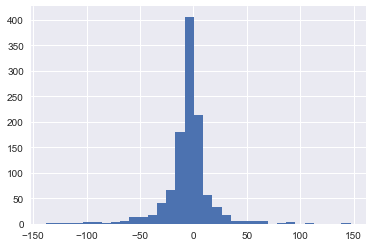

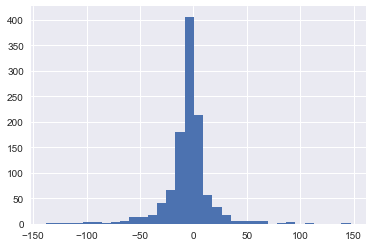

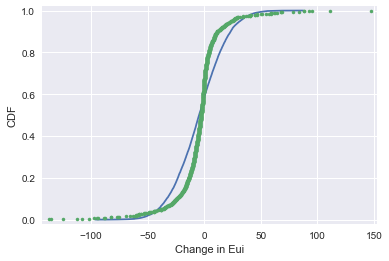

In [191]:
plt.hist(energy['eui_change_2yr'], bins = int(np.sqrt(len(energy.eui_change_2yr))))
plt.show()

# remove extreme outliers
energy = energy.loc[energy['eui_change_2yr'] < 150]
energy = energy.loc[(energy['eui_change_2yr'] > -150)]

plt.hist(energy['eui_change_2yr'], bins = int(np.sqrt(len(energy.eui_change_2yr))))
plt.show()

# looks normally distributed?

# define ecdf 
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/ n
    
    return x,y 

# Compute mean and standard deviation: mu, sigma
mu = np.mean(energy.eui_change_2yr)
sigma = np.std(energy.eui_change_2yr)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma,10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(energy.eui_change_2yr)
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')

plt.margins(0.02)

_ = plt.xlabel('Change in Eui')
_ = plt.ylabel('CDF')
plt.show()


# not normal


15.25 -22.75


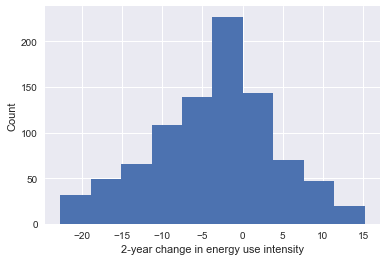

In [196]:
# notice that some places lost or gained over 75 euis over 2 years. 
# i would like to remove outliers 

# calculate outliers
# mean = energy['eui_change_2yr'].mean()
# std = energy['eui_change_2yr'].std()
# print(mean)
# print(std)
# upper_bound = mean + 3*std
# lower_bound = mean - 3*std

# use iqr to calculate outliers
median = energy['eui_change_2yr'].median()
q3 = np.percentile(energy['eui_change_2yr'], 75)
q1 = np.percentile(energy['eui_change_2yr'], 25)
iqr = q3-q1
upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr
print(upper_bound, lower_bound)

# remove outliers 

energy = energy.loc[energy['eui_change_2yr'] < upper_bound]
energy = energy.loc[(energy['eui_change_2yr'] > lower_bound)]

plt.hist(energy['eui_change_2yr'])
plt.xlabel('2-year change in energy use intensity')
plt.ylabel('Count')
plt.show()



-89020576.7
-89020576.7


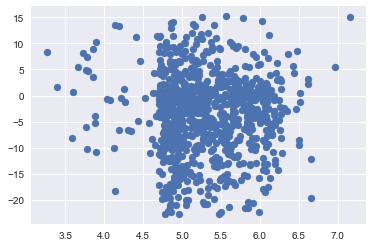

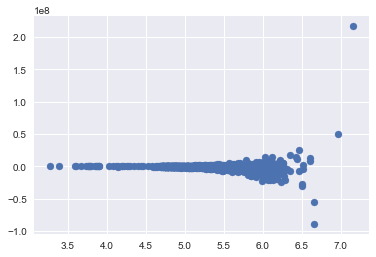

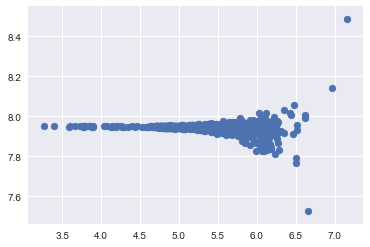

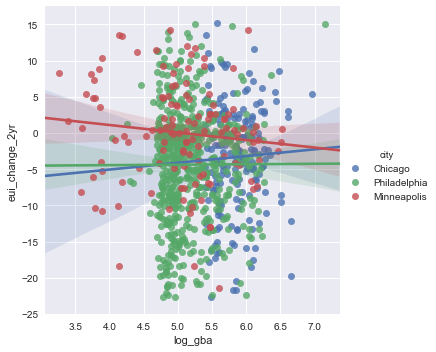

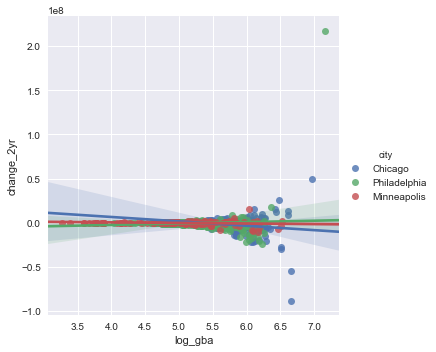

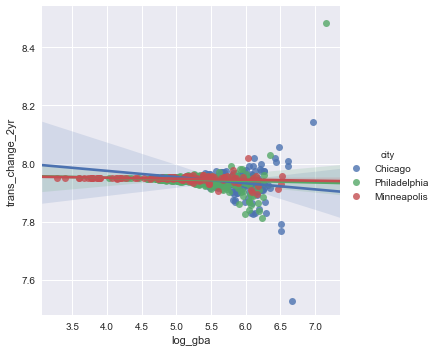

In [198]:
import math 

energy['log_gba'] = np.log10(energy['gba'])
# energy['trans_change_2yr'] = np.log10(energy['change_2yr']))

print(min(energy['change_2yr']))
print(min(energy['change_2yr']))
transformed = energy['change_2yr'] - (min(energy['change_2yr'] - 1))
energy['trans_change_2yr'] = np.log10(transformed)
energy_trans = energy.loc[energy['trans_change_2yr'] > 0 ]



plt.scatter(energy['log_gba'], energy['eui_change_2yr'])
plt.show()

plt.scatter(energy['log_gba'], energy['change_2yr'])
plt.show()

plt.scatter(energy_trans['log_gba'], energy_trans['trans_change_2yr'])
plt.show()

import seaborn as sns

sns.lmplot( x='log_gba', y="eui_change_2yr", data=energy, fit_reg=True, hue='city', legend=True)
sns.plt.show()

sns.lmplot(x='log_gba', y = 'change_2yr', data=energy, fit_reg=True, hue='city', legend=True)
sns.plt.show()

sns.lmplot(x='log_gba', y = 'trans_change_2yr', data=energy_trans, fit_reg=True, hue='city', legend=True)
sns.plt.show()




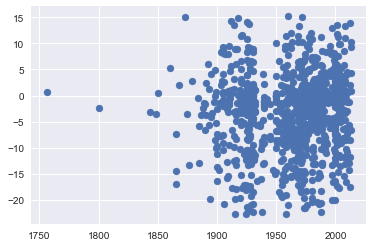

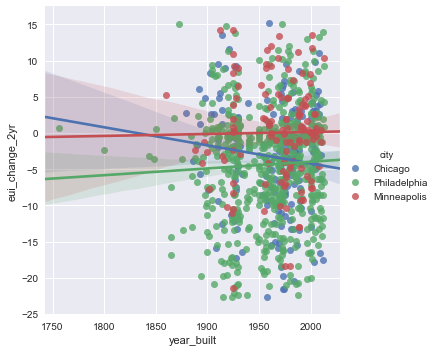

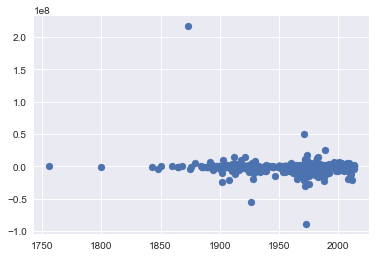

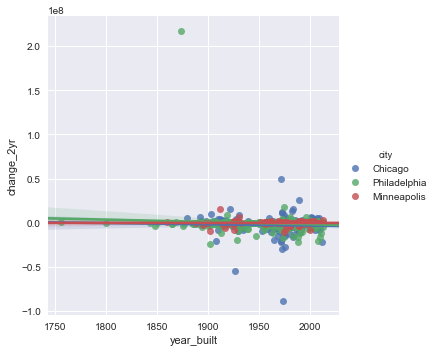

In [199]:
plt.scatter(energy['year_built'], energy['eui_change_2yr'])
plt.show()

sns.lmplot( x="year_built", y="eui_change_2yr", data=energy, fit_reg=True, hue='city', legend=True)
sns.plt.show()


plt.scatter(energy['year_built'], energy['change_2yr'])
plt.show()

sns.lmplot( x="year_built", y="change_2yr", data=energy, fit_reg=True, hue='city', legend=True)
sns.plt.show()


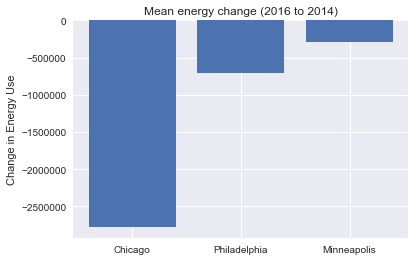

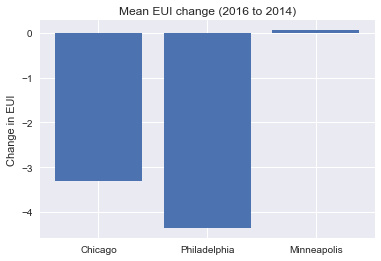

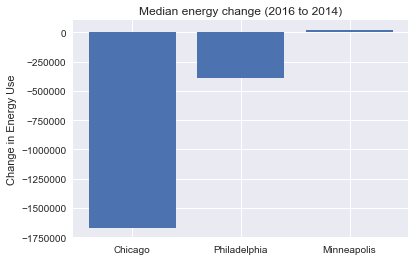

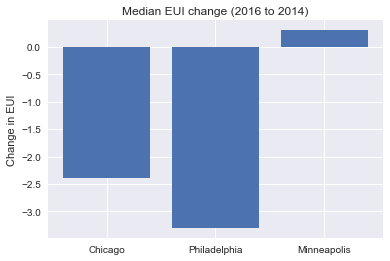

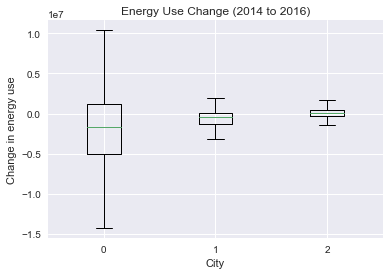

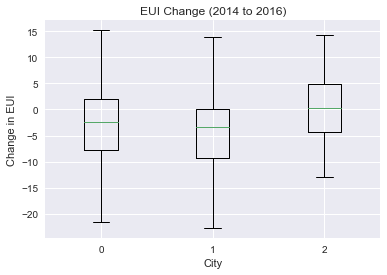

In [200]:
import numpy as np

chicago = energy.loc[energy['city'] == 'Chicago']
philly = energy.loc[energy['city'] == 'Philadelphia']
minneapolis = energy.loc[energy['city'] == 'Minneapolis']

avgloss_chicago = chicago.change_2yr.mean()
avgloss_philly = philly.change_2yr.mean()
avgloss_minne = minneapolis.change_2yr.mean()

avg_loss = [avgloss_chicago, avgloss_philly, avgloss_minne]
avg_eui_loss = [chicago.eui_change_2yr.mean(), philly.eui_change_2yr.mean(), minneapolis.eui_change_2yr.mean()]

# total energy 
labels = ['Chicago', 'Philadelphia', 'Minneapolis']
y_pos=np.arange(3)
plt.bar(y_pos, avg_loss)
plt.xticks(y_pos, labels)
plt.ylabel('Change in Energy Use')
plt.title('Mean energy change (2016 to 2014)')
plt.show()

# eui
labels = ['Chicago', 'Philadelphia', 'Minneapolis']
y_pos=np.arange(3)
plt.bar(y_pos, avg_eui_loss)
plt.xticks(y_pos, labels)
plt.ylabel('Change in EUI')
plt.title('Mean EUI change (2016 to 2014)')
plt.show()

# hard to see minneapolis
# do the same with median 

medloss_chicago = chicago.change_2yr.median()
medloss_philly = philly.change_2yr.median()
medloss_minne = minneapolis.change_2yr.median()

med_loss = [medloss_chicago, medloss_philly, medloss_minne]
med_eui_loss = [chicago.eui_change_2yr.median(), philly.eui_change_2yr.median(), minneapolis.eui_change_2yr.median()]

# energy 
labels = ['Chicago', 'Philadelphia', 'Minneapolis']
y_pos=np.arange(3)
plt.bar(y_pos, med_loss)
plt.xticks(y_pos, labels)
plt.ylabel('Change in Energy Use')
plt.title('Median energy change (2016 to 2014)')
plt.show()

# eui
labels = ['Chicago', 'Philadelphia', 'Minneapolis']
y_pos=np.arange(3)
plt.bar(y_pos, med_eui_loss)
plt.xticks(y_pos, labels)
plt.ylabel('Change in EUI')
plt.title('Median EUI change (2016 to 2014)')
plt.show()

# look at a box plot

changes = [chicago.change_2yr, philly.change_2yr, minneapolis.change_2yr]

plt.boxplot(changes, showfliers=False)
plt.xticks([1, 2, 3], ['0', '1', '2'])
plt.xlabel('City')
plt.ylabel('Change in energy use')
plt.title('Energy Use Change (2014 to 2016)')
plt.show()

changes_eui = [chicago.eui_change_2yr, philly.eui_change_2yr, minneapolis.eui_change_2yr]

plt.boxplot(changes_eui)
plt.xticks([1, 2, 3], ['0', '1', '2'])
plt.xlabel('City')
plt.ylabel('Change in EUI')
plt.title('EUI Change (2014 to 2016)')
plt.show()




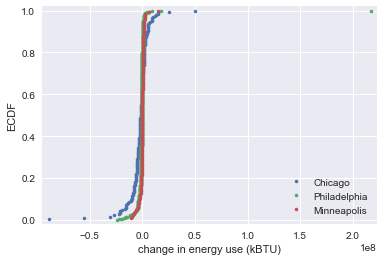

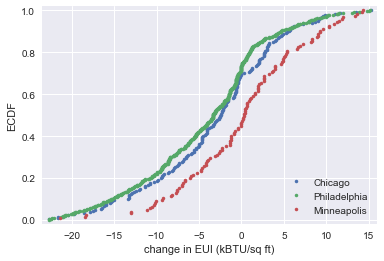

In [201]:
# calculate and plot ecdf of change in EUI by city
import numpy as np 

x_chi, y_chi = ecdf(chicago.change_2yr)
x_philly, y_philly = ecdf(philly.change_2yr)
x_minne, y_minne = ecdf(minneapolis.change_2yr)

_ = plt.plot(x_chi, y_chi, marker = '.', linestyle = 'none')
_ = plt.plot(x_philly, y_philly, marker = '.', linestyle = 'none')
_ = plt.plot(x_minne, y_minne, marker = '.', linestyle = 'none')


# Make nice margins
_ = plt.margins(0.02)

# Annotate the plot
plt.legend(('Chicago', 'Philadelphia', 'Minneapolis'), loc='lower right')
_ = plt.xlabel('change in energy use (kBTU)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()


x_chi2, y_chi2 = ecdf(chicago.eui_change_2yr)
x_philly2, y_philly2 = ecdf(philly.eui_change_2yr)
x_minne2, y_minne2 = ecdf(minneapolis.eui_change_2yr)

_ = plt.plot(x_chi2, y_chi2, marker = '.', linestyle = 'none')
_ = plt.plot(x_philly2, y_philly2, marker = '.', linestyle = 'none')
_ = plt.plot(x_minne2, y_minne2, marker = '.', linestyle = 'none')


# Make nice margins
_ = plt.margins(0.02)

# Annotate the plot
plt.legend(('Chicago', 'Philadelphia', 'Minneapolis'), loc='lower right')
_ = plt.xlabel('change in EUI (kBTU/sq ft)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

    

In [211]:
# new_energy = pd.get_dummies(energy, columns = ['city', 'prop_type'])

In [225]:
prop_types = energy.prop_type.unique()

averages = []
for prop in prop_types:
    energy_x = energy.loc[energy['prop_type'] == prop]
    avg_eui = energy_x.eui_change_2yr.mean()
    averages.append(avg_eui)


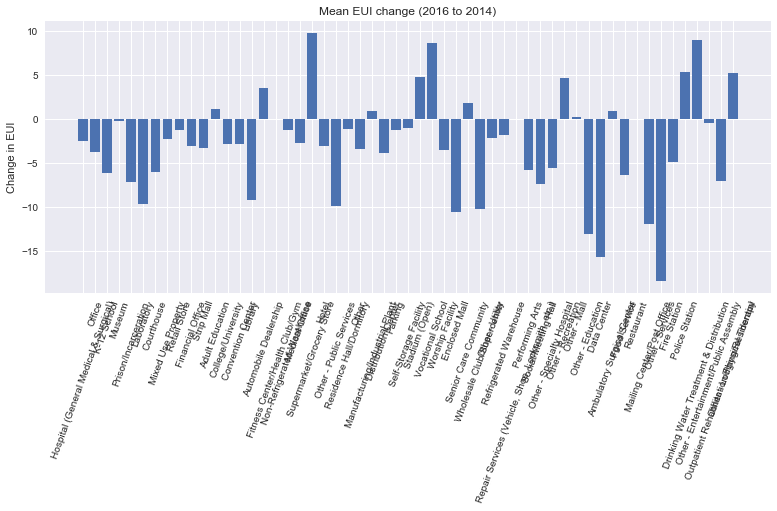

In [230]:
labels = prop_types
dims = (13, 5)
fig, ax = plt.subplots(figsize=dims)
y_pos=np.arange(len(prop_types))
plt.bar(y_pos, averages)
plt.xticks(y_pos, labels, rotation=70)
plt.ylabel('Change in EUI')
plt.title('Mean EUI change (2016 to 2014)')
plt.show()
